In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


filename = 'Cleaned_Reviews.csv'
search_path = '/content/drive/My Drive/DP_project'

for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [5]:
import pandas as pd
df = pd.read_csv(file_path)

In [4]:
df = df.iloc[:,[1,3,6,9,10,11,12,13,14,15,16,17,18,19]]
df

IndexError: ignored

In [ ]:
df['Review_Title'] = df['Review_Title'].str.strip('"')
# List of phrases to replace
phrases_to_replace = [
    "United Airlines customer review",
    "Jet Airways customer review",
    "Southwest Airlines customer review",
    "Spirit Airlines customer review",
    "Hawaiian Airlines customer review",
    "Frontier Airlines customer review",
    "Delta Air Lines customer review",
    "American Airlines customer review",
    "Alaska Airlines customer review"
]

# Replace the specified phrases with an empty string
for phrase in phrases_to_replace:
    df['Review_Title'] = df['Review_Title'].str.replace(phrase, '')

#Merge title and review
df['Review'] = df['Review_Title'] + " " + df['Review']
# Drop the "Review_Title" column
df = df.drop(columns=['Review_Title'])

df

KeyError: ignored

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Text Preprocessing
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Lowercase text
df["Review"] = df["Review"].str.lower()

# Remove special characters, numbers, and extra spaces
df["Review"] = df["Review"].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df["Review"] = df["Review"].apply(lambda x: ' '.join(x.split()))

# Remove stopwords
df["Review"] = df["Review"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# # Stemming
# df["Review_Title"] = df["Review_Title"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df["Review"] = df["Review"].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

df

,Airline Name,Review,Date Flown,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Overall_Rating
0,American Airlines,crew flight flew american airlines salt lake c...,June 2017,False,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
1,American Airlines,ive flying years never come close missing flig...,June 2014,False,Solo Leisure,Economy Class,3.0,1.0,1.0,1.0,1.0,1.0,3.0,no,1
2,American Airlines,never book airline absolutely worst changed fl...,March 2022,False,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
3,American Airlines,waiting yet another hr delay always delayed ha...,June 2021,False,Business,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
4,American Airlines,ticket credited separately booked flight ameri...,July 2023,True,Family Leisure,Economy Class,2.0,2.0,1.0,1.0,1.0,1.0,1.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14640,Frontier Airlines,havent taken yet flight supposed take pm pm st...,July 2021,True,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
14641,Frontier Airlines,cancelled flight two nights row terrible servi...,September 2023,True,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
14642,Frontier Airlines,bad experience salt lake city denver first las...,November 2017,True,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1
14643,Frontier Airlines,worst airline experience ever chicago nashvill...,July 2016,False,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,1


In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize the "Review" column while preserving airline names
def lemmatize_review(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply lemmatization to the "Review" column
df['Review'] = df['Review'].apply(lemmatize_review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['Review_Length'] = df['Review'].apply(len)
df['Review_Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # For bi-grams
X_ngrams = ngram_vectorizer.fit_transform(df['Review'])

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
# Feature Engineering with TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X = tfidf_vectorizer.fit_transform(df["Review"])
y = df["Airline Name"]

lda = LatentDirichletAllocation(n_components=5, random_state=42)
topic_features= lda.fit_transform(X)
# Assign topics to documents based on the highest probability topic
df['Assigned_Topic'] = topic_features.argmax(axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the unique airline names and transform the "Airline" column
df['Airline Name'] = label_encoder.fit_transform(df['Airline Name'])
df['Recommended'] = label_encoder.fit_transform(df['Recommended'])

In [ ]:
# Define a function to tokenize text
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply tokenization to the "Review" column
df['Tokenized_Review'] = df['Review'].apply(tokenize_text)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer instance
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment of a review
def get_sentiment(review):
    sentiment_scores = sia.polarity_scores(review)
    # Determine the overall sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each review in the dataframe
df['Sentiment'] = df['Review'].apply(get_sentiment)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Split the data
X = df['Review']  # Features
y = df['Sentiment']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing and TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train a model (Logistic Regression)
model = LogisticRegression(max_iter=1000)  # You can choose a different model
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.83
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1667
     neutral       0.00      0.00      0.00        53
    positive       0.84      0.77      0.80      1209

    accuracy                           0.83      2929
   macro avg       0.55      0.55      0.55      2929
weighted avg       0.81      0.83      0.82      2929

Confusion Matrix:
[[1500    0  167]
 [  38    0   15]
 [ 284    0  925]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load your preprocessed data
# df = pd.read_csv("preprocessed_data.csv")
X = df['Review']
y = df['Sentiment']

# Convert text data to numerical sequences using Tokenizer
max_words = 1000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# Pad sequences to have the same length
max_sequence_length = 100  # Define your sequence length
X = pad_sequences(X, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for 3 sentiment classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Now, you can use this trained model to make predictions on new data.


Epoch 1/5
147/147 [==============================] - 23s 102ms/step - loss: 0.7576 - accuracy: 0.6111 - val_loss: 0.6276 - val_accuracy: 0.7244
Epoch 2/5
147/147 [==============================] - 3s 19ms/step - loss: 0.5473 - accuracy: 0.7677 - val_loss: 0.5385 - val_accuracy: 0.7790
Epoch 3/5
147/147 [==============================] - 2s 15ms/step - loss: 0.4751 - accuracy: 0.8121 - val_loss: 0.5069 - val_accuracy: 0.7978
Epoch 4/5
147/147 [==============================] - 2s 12ms/step - loss: 0.4361 - accuracy: 0.8310 - val_loss: 0.5048 - val_accuracy: 0.7931
Epoch 5/5
92/92 [==============================] - 1s 6ms/step - loss: 0.5118 - accuracy: 0.8027
Accuracy: 0.8026630282402039


In [ ]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 5ms/step - loss: 0.5118 - accuracy: 0.8027
Accuracy: 0.8026630282402039
92/92 [==============================] - 1s 3ms/step


ValueError: ignored

Epoch 1/5
147/147 [==============================] - 19s 114ms/step - loss: 0.6830 - accuracy: 0.6710 - val_loss: 0.5503 - val_accuracy: 0.7705
Epoch 2/5
147/147 [==============================] - 11s 74ms/step - loss: 0.4408 - accuracy: 0.8290 - val_loss: 0.5378 - val_accuracy: 0.7918
Epoch 3/5
147/147 [==============================] - 7s 47ms/step - loss: 0.3079 - accuracy: 0.8921 - val_loss: 0.5861 - val_accuracy: 0.7611
Epoch 4/5
147/147 [==============================] - 6s 42ms/step - loss: 0.2263 - accuracy: 0.9223 - val_loss: 0.6420 - val_accuracy: 0.7918
Epoch 5/5
92/92 [==============================] - 1s 9ms/step - loss: 0.6742 - accuracy: 0.7992
Accuracy: 0.7992488741874695
92/92 [==============================] - 1s 6ms/step


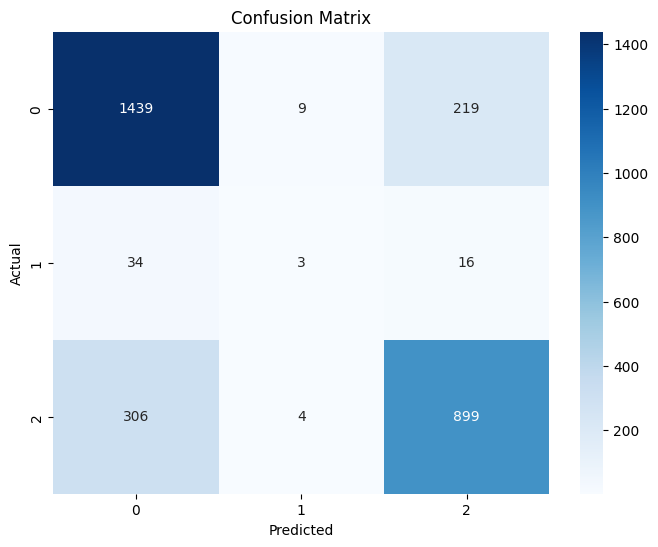

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1667
           1       0.19      0.06      0.09        53
           2       0.79      0.74      0.77      1209

    accuracy                           0.80      2929
   macro avg       0.60      0.55      0.56      2929
weighted avg       0.79      0.80      0.79      2929



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset
# Assuming you have a DataFrame 'df' with 'Review' and 'Sentiment' columns
# If not, replace 'df' with your DataFrame
# Example:
# df = pd.read_csv("your_preprocessed_dataset.csv")

# Tokenize the text data
max_words = 10000  # Adjust as needed
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Review'])
X = tokenizer.texts_to_sequences(df['Review'])
X = pad_sequences(X)

# Encode the sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))  # Assuming 3 sentiment classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert label_encoder.classes_ to a list of strings
class_labels = [str(label) for label in label_encoder.classes_]

# Print classification report
report = classification_report(y_test, y_pred_classes, target_names=class_labels)
print(report)



In [ ]:
# Convert label_encoder.classes_ to a list of strings
class_labels = [str(label) for label in label_encoder.classes_]

# Print classification report
report = classification_report(y_test, y_pred_classes, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1667
           1       0.19      0.06      0.09        53
           2       0.79      0.74      0.77      1209

    accuracy                           0.80      2929
   macro avg       0.60      0.55      0.56      2929
weighted avg       0.79      0.80      0.79      2929



In [ ]:
import numpy as np

# Assuming y_test contains the true labels and y_pred_classes contains the predicted labels
unique, counts = np.unique(y_pred_classes, return_counts=True)

sentiment_counts = dict(zip(unique, counts))
print("Sentiment Class Counts:")
print(sentiment_counts)


Sentiment Class Counts:
{0: 1779, 1: 16, 2: 1134}


Accuracy: 0.8265619665414817
              precision    recall  f1-score   support

    Negative       0.82      0.89      0.86      1667
     Neutral       0.00      0.00      0.00        53
    Positive       0.83      0.77      0.80      1209

    accuracy                           0.83      2929
   macro avg       0.55      0.56      0.55      2929
weighted avg       0.81      0.83      0.82      2929



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


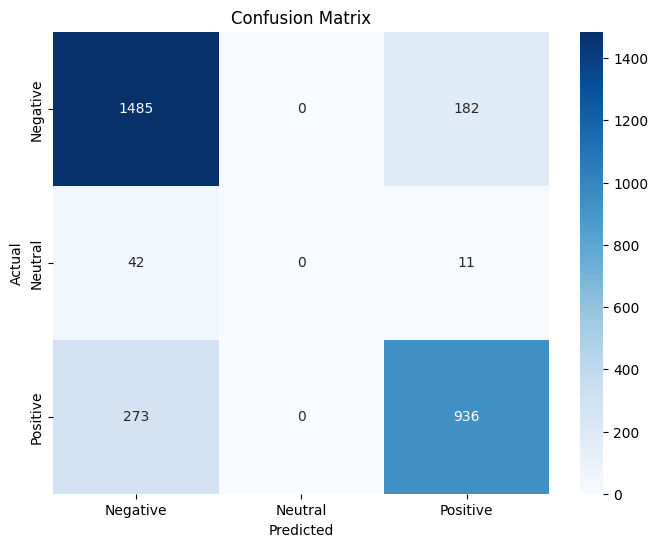

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset (make sure it contains 'Review' and 'Sentiment' columns)
# Example: df = pd.read_csv("preprocessed_data.csv")

# Split the data into training and testing sets
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print(report)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7688630932058723
              precision    recall  f1-score   support

    Negative       0.74      0.92      0.82      1667
     Neutral       0.00      0.00      0.00        53
    Positive       0.84      0.59      0.69      1209

    accuracy                           0.77      2929
   macro avg       0.53      0.50      0.50      2929
weighted avg       0.77      0.77      0.75      2929



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


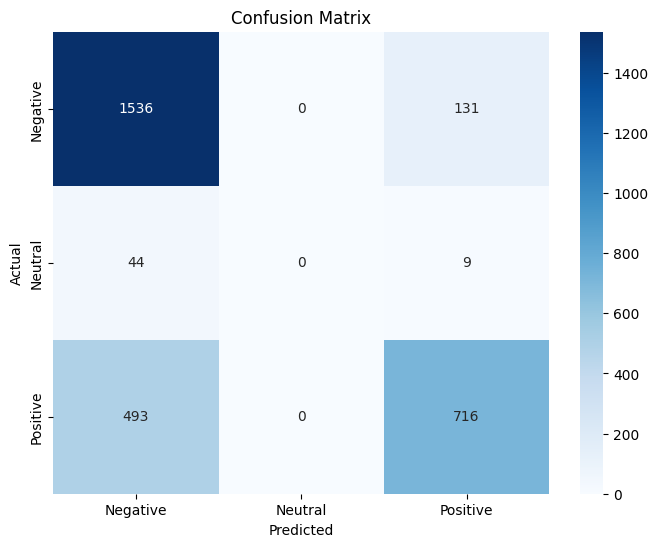

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset (make sure it contains 'Review' and 'Sentiment' columns)
# Example: df = pd.read_csv("preprocessed_data.csv")

# Split the data into training and testing sets
X = df['Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
print(report)

# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os


filename = 'Cleaned_Reviews.csv'
search_path = '/content/drive/My Drive'

for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

In [ ]:
df=df.head(2930)

In [ ]:
df2=df['Review']

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(Review):
    stop_words = set(stopwords.words('english'))
    words = Review.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)
df2 = df2.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df2=df2.head(2930)

In [ ]:
df2.head()

0    crew flight flew american airline salt lake ci...
1    ive flying year never come close missing fligh...
2    never book airline absolutely worst changed fl...
3    waiting yet another hr delay always delayed ha...
4    ticket credited separately booked flight ameri...
Name: Review, dtype: object

In [ ]:
df2.shape

(2930,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the CountVectorizer with max_df parameter
max_df = 0.9  # Words appearing in over 90% of the documents will be excluded
vectorizer = CountVectorizer(max_df=max_df)

# Fit and transform your data
df2 = vectorizer.fit_transform(df2)  # Assuming df is a list of text documents

# Now, X contains your text data with high-frequency words filtered out


In [ ]:
df2=df['Review'].tolist()

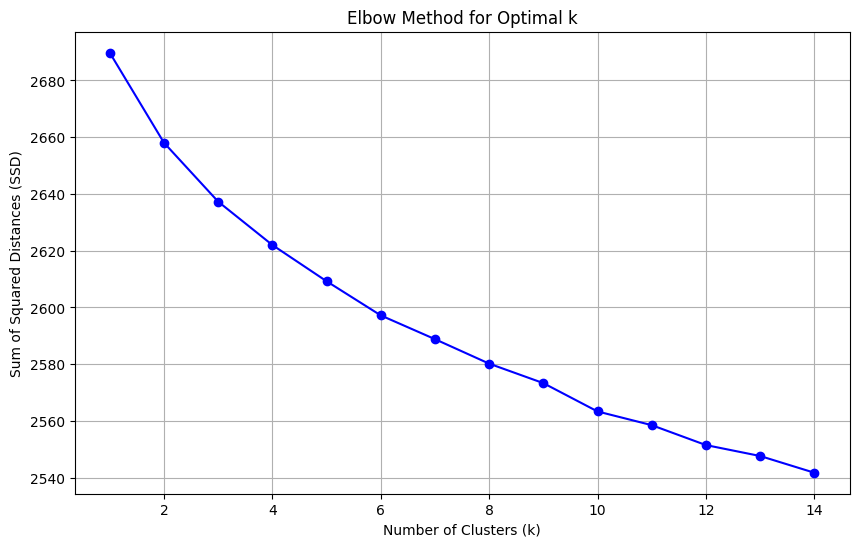

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_data.csv')


# Create a TF-IDF vectorizer to convert text into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the text data using TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(df2)

# Initialize an empty list to store the sum of squared distances
ssd = []

for k in range(1, 15):  # You can adjust the range based on your needs
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    ssd.append(kmeans.inertia_)

# Create a plot to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), ssd, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
!pip install bertopic datasets accelerate bitsandbytes xformers adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 89.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134

In [ ]:
!pip install huggingface-hub

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from torch import cuda

model_id = 'meta-llama/Llama-2-13b-chat-hf'
device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

print(device)

cuda:0


In [ ]:
from torch import bfloat16
import transformers

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,  # 4-bit quantization
    bnb_4bit_quant_type='nf4',  # Normalized float 4
    bnb_4bit_use_double_quant=True,  # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16  # Computation type
)

In [ ]:
# Llama 2 Tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained(model_id)

# Llama 2 Model
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    quantization_config=bnb_config,
    device_map='auto',
)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
generator = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    temperature=0.1,
    max_new_tokens=500,
    repetition_penalty=1.1
)

In [ ]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("BAAI/bge-small-en")
embeddings = embedding_model.encode(df2, show_progress_bar=True)

Batches:   0%|          | 0/92 [00:00<?, ?it/s]

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=4, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
from bertopic.representation import KeyBERTInspired, TextGeneration

# KeyBERT
keybert = KeyBERTInspired()
# Text generation with Llama 2
llama2 = TextGeneration(generator)

# All representation models
representation_model = {
    "KeyBERT": keybert,
    "Llama2": llama2,
}

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

  # Sub-models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(df2, embeddings)

2023-11-02 04:50:53,841 - BERTopic - Reduced dimensionality
2023-11-02 04:50:53,992 - BERTopic - Clustered reduced embeddings
100%|██████████| 120/120 [14:13<00:00,  7.12s/it]


In [ ]:
llama2_labels = [label[0][0].split("\n")[0] for label in topic_model.get_topics(full=True)["Llama2"].values()]

topic_model.set_topic_labels(llama2_labels)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,KeyBERT,Llama2,Representative_Docs
0,-1,1356,-1_flight_airline_american_hour,"""American Airlines Flight Time""","[flight, airline, american, hour, time, get, a...","[airline, flight, flying, passenger, fly, airp...","[""American Airlines Flight Time""\n\nPlease let...",[horrible experience customer service purchase...
1,0,163,0_rude_attendant_unprofessional_asked,"""Airline Staff Unprofessional Behavior""","[rude, attendant, unprofessional, asked, staff...","[airline, passenger, unprofessional, flight, r...","[""Airline Staff Unprofessional Behavior""\n\nPl...",[unprofessional staff lax baffled unprofession...
2,1,148,1_customer_service_terrible_worst,"""Terrible Customer Service at the Gate - Worst...","[customer, service, terrible, worst, gate, hor...","[airline, flight, flying, spoke, plane, worst,...","[""Terrible Customer Service at the Gate - Wors...",[worst customer service experience booked flig...
3,2,57,2_good_lounge_class_club,"""Admiral's Club Lounge - Excellent Business Cl...","[good, lounge, class, club, admiral, business,...","[inflight, flight, lax, aircraft, boeing, frie...","[""Admiral's Club Lounge - Excellent Business C...",[cabin crew pleasant initial flight sjo mia ea...
4,3,42,3_seat_together_extra_paid,,"[seat, together, extra, paid, upgrade, assigne...","[airline, flight, seat, payed, fare, booked, f...",[\nAirlines Seat Upgrades and Downgrades\n\nPl...,[flying ever booked flight back sep feb trip p...
...,...,...,...,...,...,...,...,...
115,114,4,114_wholly_puerta_wouldnt_grade,"""Wholly Unacceptable Ill-Grade Penny in Vallarta""","[wholly, puerta, wouldnt, grade, ill, unaccept...","[airline, flight, american, plane, fly, , , , , ]","[""Wholly Unacceptable Ill-Grade Penny in Valla...",[ill never fly american worst airline ever fli...
116,115,4,115_japanese_particularly_demonstrated_exactly,,"[japanese, particularly, demonstrated, exactly...","[inflight, chicago, chicagobased, attendant, d...",[\nEfficiency in Japanese Management\n\nPlease...,[demonstrated welcome degree efficiency accomm...
117,116,4,116_worst_star_rule_outage,"""Worst Star Rule Outage Worth Redirect Ft Quit...","[worst, star, rule, outage, worth, redirect, f...","[airline, overbooking, flight, worst, flew, ha...","[""Worst Star Rule Outage Worth Redirect Ft Qui...",[worst airline ever dallas vancouver american ...
118,117,4,117_edinburgh_hugely_scotland_screen,,"[edinburgh, hugely, scotland, screen, download...","[plane, abysmal, jfk, downhill, uncomfortable,...",[\nA) Edinburgh Festival Fringe\nB) Scotland's...,[probably last time use new york jfk los angel...
